In [2]:
import sys
sys.path.append('./latent-diffusion/ldm/data/')

In [3]:
import numpy as np
from ct_rsna import CTDataset, CTOverfit
from torchvision import transforms
from matplotlib import pyplot as plt

In [4]:
np.random.seed(7)

In [5]:
train_dir = './data/ct-rsna/train'

In [9]:
ct_ds = CTOverfit(data_dir=train_dir, labels_file='train_set.csv', size=256, flip_prob=0.)


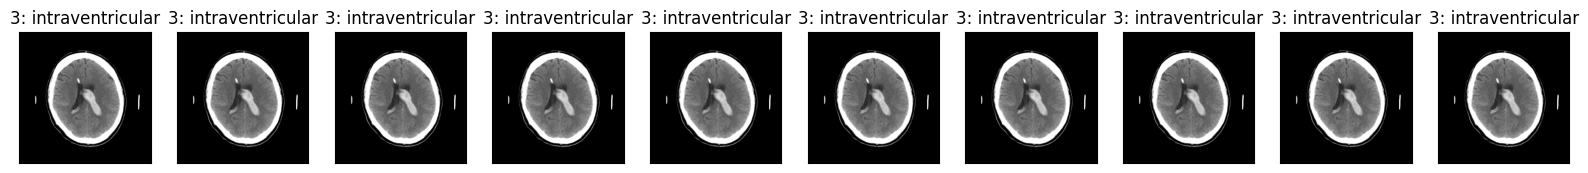

In [9]:
N = 10
plt.figure(figsize=(20, 5))
for i, idx in enumerate(np.random.choice(len(ct_ds), N)):

    data = ct_ds[idx]
    x, y, label = data['image'], data['class_label'], data['human_label']

    title = f'{int(y)}: {label}'

    plt.subplot(1, N, i+1)
    plt.imshow(x[..., 0].squeeze(), cmap='gray', vmin=-1., vmax=1.)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

plt.show()

torch.Size([1, 256, 256, 3])


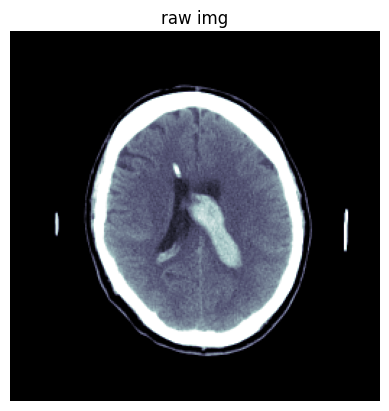

In [21]:
import torch
trainloader = torch.utils.data.DataLoader(ct_ds, batch_size=1, shuffle=True)
for d in trainloader:
  print(d['image'].shape)
  img = d['image'][0, :, :, :].squeeze()
  # print(d['image'].squeeze().shape)
  # print(d['image'].max())
  # print(d['image'].min())
  # print(d['image'].mean())
    
  plt.imshow(img[:, :, 0], cmap=plt.cm.bone)
  plt.title('raw img')
  plt.axis('off')
  plt.show()
